<a href="https://colab.research.google.com/github/Shireesha1631/global-vehicle-analysis/blob/main/Cleaned%20EV%20and%20Tesla%20data%20%2B%20visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [8]:
ev_url = "https://raw.githubusercontent.com/Shireesha1631/global-vehicle-analysis/main/data/ev_sales.csv"
ev_df = pd.read_csv(ev_url)
ev_df.head()


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [10]:
# Check data info
ev_df.info()

# Summary statistics of numerical columns
ev_df.describe()

# Check unique values in key columns
print(ev_df['region'].unique())
print(ev_df['powertrain'].unique())
print(ev_df['parameter'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB
['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Korea' 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Rest of the world

In [12]:
print(ev_df.columns)


Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')


In [15]:
import pandas as pd

# Assuming ev_df is loaded

# Rename 'region' to 'country'
ev_df = ev_df.rename(columns={'region': 'country'})

# Pivot the table to wide format, with 'parameter' values as columns
ev_wide = ev_df.pivot_table(index=['country', 'year'],
                            columns='parameter',
                            values='value').reset_index()

# Optionally, rename columns to simpler names (check exact parameter names first)
ev_wide = ev_wide.rename(columns={
    'Electric car sales (IEA, 2023)': 'ev_sales',
    'Total car sales (IEA, 2023)': 'total_sales',
    'Electric car sales as a share of total sales (IEA, 2023)': 'ev_share'
})

# Select columns you want and drop rows with missing values
ev_wide = ev_wide[['country', 'year']].dropna().reset_index(drop=True)

print(ev_wide.head())


parameter    country  year
0          Australia  2011
1          Australia  2012
2          Australia  2013
3          Australia  2014
4          Australia  2015


In [16]:
print(ev_df['parameter'].unique())

['EV stock share' 'EV sales share' 'EV sales' 'EV stock'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']


In [17]:
import pandas as pd

# Rename 'region' to 'country'
ev_df = ev_df.rename(columns={'region': 'country'})

# Filter to only keep rows with parameters we want
ev_df_filtered = ev_df[ev_df['parameter'].isin(['EV sales', 'EV sales share'])]

# Pivot the table to wide format, with parameters as columns
ev_wide = ev_df_filtered.pivot_table(index=['country', 'year'],
                                    columns='parameter',
                                    values='value').reset_index()

# Rename columns to simpler names
ev_wide = ev_wide.rename(columns={
    'EV sales': 'ev_sales',
    'EV sales share': 'ev_share'
})

# Select relevant columns and drop any rows with missing values
ev_wide = ev_wide[['country', 'year', 'ev_sales', 'ev_share']].dropna().reset_index(drop=True)

print(ev_wide.head())


parameter    country  year  ev_sales  ev_share
0          Australia  2011      49.0    0.0065
1          Australia  2012     125.0    0.0300
2          Australia  2013     145.0    0.0340
3          Australia  2014     660.0    0.1600
4          Australia  2015     880.0    0.2000


In [18]:
print("Missing values per column:\n", ev_wide.isnull().sum())
print("Number of duplicate rows:", ev_wide.duplicated().sum())

# Step 2: Drop duplicate rows if any
ev_wide = ev_wide.drop_duplicates()

# Step 3: Handle missing values
# Option A: Drop rows with any missing values
ev_wide_clean = ev_wide.dropna()

# Option B (optional): Fill missing values (example: fill ev_share with 0)
# ev_wide_clean = ev_wide.fillna({'ev_share': 0})

# Step 4: Convert year to integer (if not already)
ev_wide_clean['year'] = ev_wide_clean['year'].astype(int)

# Convert sales and share columns to numeric (in case they are object/string)
ev_wide_clean['ev_sales'] = pd.to_numeric(ev_wide_clean['ev_sales'], errors='coerce')
ev_wide_clean['ev_share'] = pd.to_numeric(ev_wide_clean['ev_share'], errors='coerce')

# After conversion, drop any rows where conversion failed (NaNs introduced)
ev_wide_clean = ev_wide_clean.dropna(subset=['ev_sales', 'ev_share'])

# Step 5: Reset index
ev_wide_clean = ev_wide_clean.reset_index(drop=True)

print("\nCleaned data info:")
print(ev_wide_clean.info())
print(ev_wide_clean.head())

Missing values per column:
 parameter
country     0
year        0
ev_sales    0
ev_share    0
dtype: int64
Number of duplicate rows: 0

Cleaned data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   623 non-null    object 
 1   year      623 non-null    int64  
 2   ev_sales  623 non-null    float64
 3   ev_share  623 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 19.6+ KB
None
parameter    country  year  ev_sales  ev_share
0          Australia  2011      49.0    0.0065
1          Australia  2012     125.0    0.0300
2          Australia  2013     145.0    0.0340
3          Australia  2014     660.0    0.1600
4          Australia  2015     880.0    0.2000


In [19]:
print(ev_wide_clean.isnull().sum())    # should be zeros for all columns
print(ev_wide_clean.duplicated().sum())  # should be 0
print(ev_wide_clean.dtypes)              # check data types


parameter
country     0
year        0
ev_sales    0
ev_share    0
dtype: int64
0
parameter
country      object
year          int64
ev_sales    float64
ev_share    float64
dtype: object


In [20]:
tesla_url = 'https://raw.githubusercontent.com/Shireesha1631/global-vehicle-analysis/refs/heads/main/data/tesla_user_satisfaction.csv'
tesla_df = pd.read_csv(tesla_url)
print(tesla_df.head())
print(tesla_df.info())

   Unnamed: 0                  Review_Date      Author_Name  \
0           0   on 08/30/18 15:36 PM (PDT)              TN    
1           1   on 07/04/18 17:15 PM (PDT)          Ryan W    
2           2   on 06/21/18 05:22 AM (PDT)          Bamboo    
3           3   on 04/07/18 15:01 PM (PDT)             Mel    
4           4   on 12/30/17 21:45 PM (PST)  Dallen Ormond     

                                       Vehicle_Title  \
0  2018 Tesla Model X SUV 75D 4dr SUV AWD (electr...   
1  2018 Tesla Model X SUV 100D 4dr SUV AWD (elect...   
2  2017 Tesla Model X SUV 100D 4dr SUV AWD (elect...   
3  2017 Tesla Model X SUV 100D 4dr SUV AWD (elect...   
4  2017 Tesla Model X SUV P100D 4dr SUV AWD (elec...   

                           Review_Title  \
0                      Not for everyone   
1  Crazy good, despite many small flaws   
2                  If only my X can fly   
3                  Little disappointed.   
4                            Fantastic    

                         

In [21]:
# See basic info
print(tesla_df.info())

# Preview first few rows
print(tesla_df.head())

# Check for missing values per column
print(tesla_df.isnull().sum())

# Check duplicates
print(tesla_df.duplicated().sum())

# See summary stats for numeric columns
print(tesla_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     140 non-null    int64  
 1   Review_Date    140 non-null    object 
 2   Author_Name    140 non-null    object 
 3   Vehicle_Title  140 non-null    object 
 4   Review_Title   140 non-null    object 
 5   Review         140 non-null    object 
 6   Rating         140 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 7.8+ KB
None
   Unnamed: 0                  Review_Date      Author_Name  \
0           0   on 08/30/18 15:36 PM (PDT)              TN    
1           1   on 07/04/18 17:15 PM (PDT)          Ryan W    
2           2   on 06/21/18 05:22 AM (PDT)          Bamboo    
3           3   on 04/07/18 15:01 PM (PDT)             Mel    
4           4   on 12/30/17 21:45 PM (PST)  Dallen Ormond     

                                       Vehicle_Title  

In [23]:
tesla_df = tesla_df.drop_duplicates()
tesla_df = tesla_df.dropna()


In [30]:
print(tesla_df.info())
print(tesla_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Review_Date    0 non-null      datetime64[ns]
 1   Author_Name    140 non-null    object        
 2   Vehicle_Title  140 non-null    object        
 3   Review_Title   140 non-null    object        
 4   Review         140 non-null    object        
 5   Rating         140 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 6.7+ KB
None
Review_Date      140
Author_Name        0
Vehicle_Title      0
Review_Title       0
Review             0
Rating             0
dtype: int64


In [32]:
tesla_df['Review_Date'] = pd.to_datetime(tesla_df['Review_Date'], errors='coerce')

In [33]:
for col in tesla_df.select_dtypes(include='object').columns:
    tesla_df[col] = tesla_df[col].str.strip()

# Reset index after cleaning
tesla_df = tesla_df.reset_index(drop=True)

# Final check
print(tesla_df.info())
print(tesla_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Review_Date    0 non-null      datetime64[ns]
 1   Author_Name    140 non-null    object        
 2   Vehicle_Title  140 non-null    object        
 3   Review_Title   140 non-null    object        
 4   Review         140 non-null    object        
 5   Rating         140 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 6.7+ KB
None
  Review_Date    Author_Name  \
0         NaT             TN   
1         NaT         Ryan W   
2         NaT         Bamboo   
3         NaT            Mel   
4         NaT  Dallen Ormond   

                                       Vehicle_Title  \
0  2018 Tesla Model X SUV 75D 4dr SUV AWD (electr...   
1  2018 Tesla Model X SUV 100D 4dr SUV AWD (elect...   
2  2017 Tesla Model X SUV 100D 4dr SUV AWD (elect..

In [34]:
# Reload the original CSV
url = 'https://raw.githubusercontent.com/Shireesha1631/global-vehicle-analysis/refs/heads/main/data/tesla_user_satisfaction.csv'
tesla_df = pd.read_csv(url)

# Print the first few values in Review_Date
print(tesla_df['Review_Date'].head())


0     on 08/30/18 15:36 PM (PDT)
1     on 07/04/18 17:15 PM (PDT)
2     on 06/21/18 05:22 AM (PDT)
3     on 04/07/18 15:01 PM (PDT)
4     on 12/30/17 21:45 PM (PST)
Name: Review_Date, dtype: object


In [35]:
tesla_df['Review_Date'] = tesla_df['Review_Date'].str.replace('on ', '', regex=False)  # remove 'on '
tesla_df['Review_Date'] = tesla_df['Review_Date'].str.replace(r'\s*(AM|PM) \(P[DS]T\)', '', regex=True)  # remove 'AM/PM (PDT)' or 'PM (PST)'

# Step 3: Convert to datetime
tesla_df['Review_Date'] = pd.to_datetime(tesla_df['Review_Date'], errors='coerce')

# Step 4: Check results
print(tesla_df['Review_Date'].head())
print(tesla_df['Review_Date'].isnull().sum(), "missing dates after conversion")

0   2018-08-30 15:36:00
1   2018-07-04 17:15:00
2   2018-06-21 05:22:00
3   2018-04-07 15:01:00
4   2017-12-30 21:45:00
Name: Review_Date, dtype: datetime64[ns]
0 missing dates after conversion


/tmp/ipython-input-35-270355504.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tesla_df['Review_Date'] = pd.to_datetime(tesla_df['Review_Date'], errors='coerce')


/tmp/ipython-input-39-2480328985.py:12: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


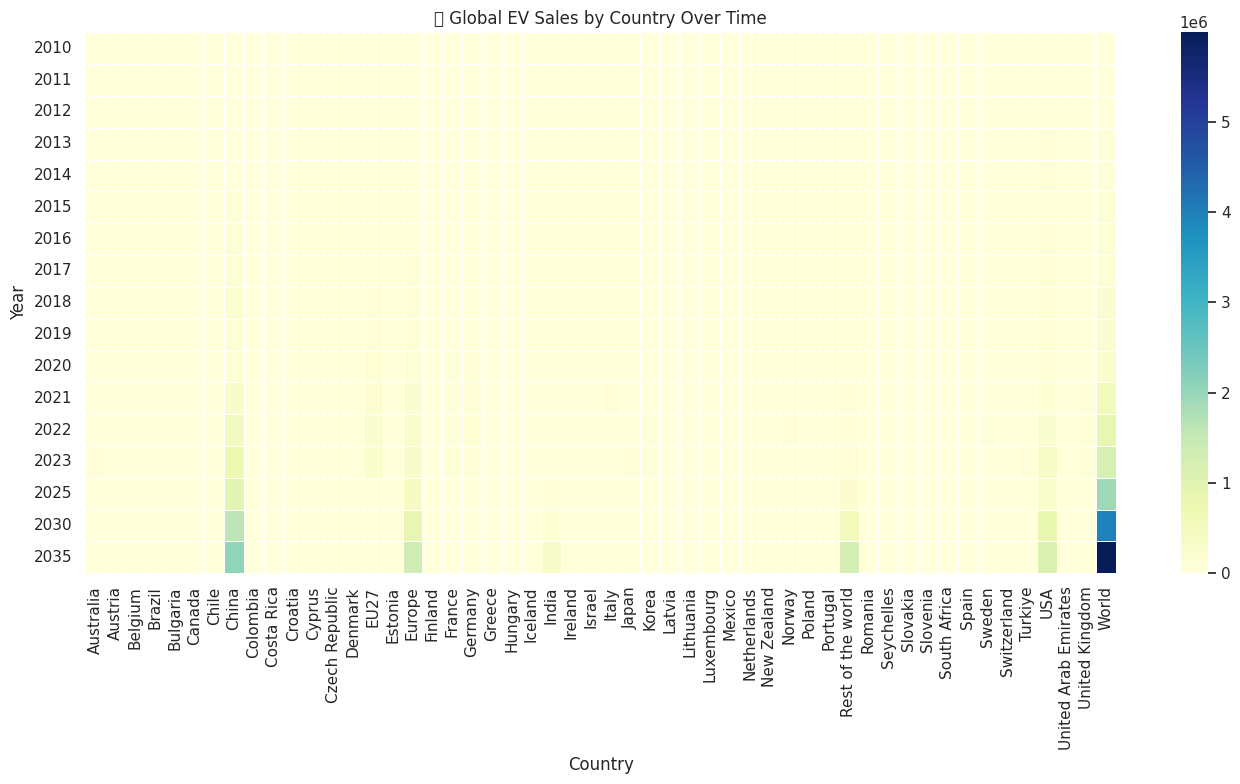

/tmp/ipython-input-39-2480328985.py:28: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


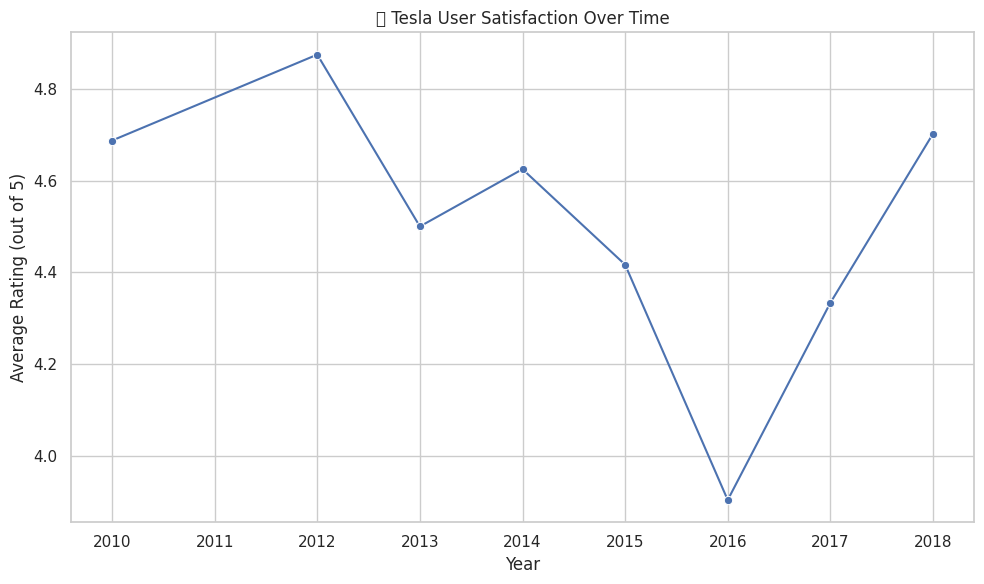

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Heatmap of Global EV Sales by Country Over Time
sales_pivot = ev_wide_clean.pivot_table(index='year', columns='country', values='ev_sales', aggfunc='sum').fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(sales_pivot, cmap="YlGnBu", linewidths=0.5)
plt.title("🌍 Global EV Sales by Country Over Time")
plt.ylabel("Year")
plt.xlabel("Country")
plt.tight_layout()
plt.show()


# 2. Prepare Tesla Satisfaction Data for plotting average rating by year
tesla_df['Review_Year'] = tesla_df['Review_Date'].dt.year

satisfaction_grouped = tesla_df.groupby('Review_Year')['Rating'].mean().reset_index()

# 3. Plot Tesla User Satisfaction Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=satisfaction_grouped, x='Review_Year', y='Rating', marker='o')
plt.title("⭐ Tesla User Satisfaction Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating (out of 5)")
plt.grid(True)
plt.tight_layout()
plt.show()
